In [1]:
import numpy as np
import matplotlib.pyplot as plt

def data1():
    x = [np.random.rand() for i in range(1000)]
    y = [x[i] + 0.05*np.random.rand() for i in range(1000)]
    return [x, y]

def data2():
    x = [np.random.rand() for i in range(1000)]
    y = [(x[i])**2 + 0.05*np.random.rand() for i in range(1000)]
    return [x, y]

# Standardisation of Data
def std_data(nparray):
    # Implement standardisation of data
    mean = np.mean(nparray, axis=1, keepdims=True)
    std_dev = np.std(nparray, axis=1, keepdims=True)
    return (nparray - mean) / std_dev

In [2]:
def DimReduction(arr):
    data_set = np.array(arr)
    std_data_set = std_data(data_set)
    
    # Implement PCA and find the best fit line, using slope and intercept
    m = 0
    c = 0
    # Compute the covariance matrix
    cov_matrix = np.cov(std_data_set)
    
    # Compute the eigenvectors and eigenvalues
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    
    # Sort the eigenvectors by decreasing eigenvalues
    idx = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, idx]
    
    # Select the top k eigenvectors (here k=1 for best fit line)
    top_eigenvector = sorted_eigenvectors[:, 0]
    
    # Project the data onto the lower-dimensional subspace
    projected_data = np.dot(top_eigenvector.T, std_data_set)
    
    # To find the best fit line in the original scale
    m = top_eigenvector[1] / top_eigenvector[0]
    c = np.mean(data_set[1]) - m * np.mean(data_set[0])
    
    # Displaying the result using matplotlib
    plt.scatter(data_set[0], data_set[1], color = "red")
    plt.plot(data_set[0], data_set[0]*m + c)
    print("Slope =", m, "Intercept =", c)
    plt.title("Best Fit Line")
    plt.show()

Slope = 1.0 Intercept = 0.023819368340674885


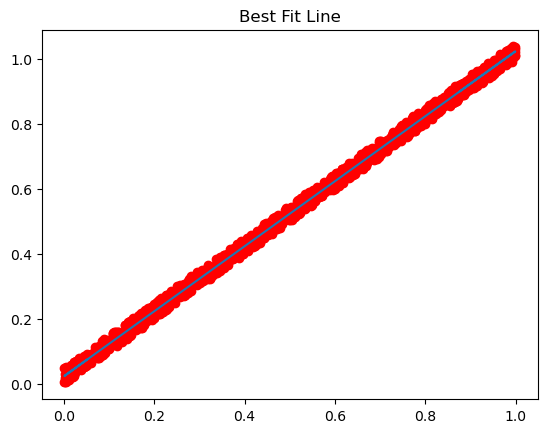

Slope = 0.9999999999999997 Intercept = -0.1426692768244604


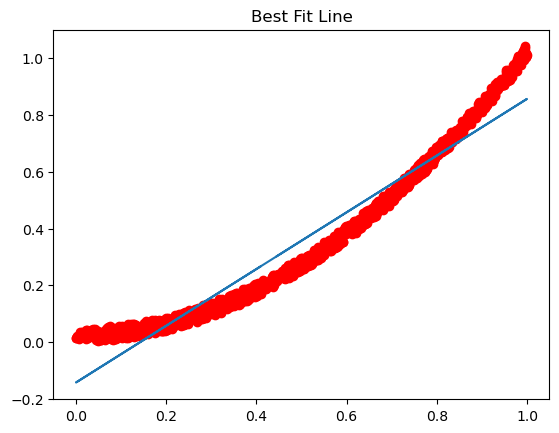

In [3]:
DimReduction(data1())
DimReduction(data2())